In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
# Constants
IMG_SIZE = 128
DATA_PATH = "C:/Users/marve/Vidhyuth/Programming/Datasets/Fingerprint_images/SOCOFing"

def load_images_multiclass(data_path):
    images = []
    labels = []
    categories = ['Real', 'Altered-Easy', 'Altered-Medium', 'Altered-Hard']
    for label, category in enumerate(categories):
        category_path = os.path.join(data_path, category)
        for img_file in os.listdir(category_path):
            img = cv2.imread(os.path.join(category_path, img_file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)
    images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    labels = np.array(labels)
    return images, labels

# Load and preprocess dataset
images, labels = load_images_multiclass(DATA_PATH)
images = images / 255.0  # Normalize pixel values

In [3]:
np.unique(labels)

array([0, 1, 2, 3])

In [4]:
labels = to_categorical(labels)  # One-hot encode labels

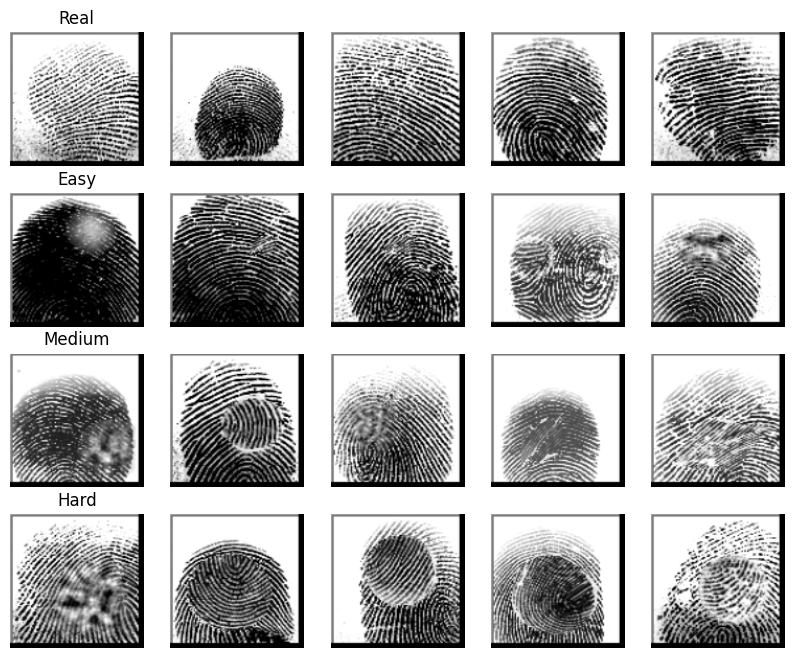

In [5]:
# Define a function to plot sample images
def plot_sample_images(images, labels, categories, num_samples=5):
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(num_samples * 2, len(categories) * 2))
    for i, category in enumerate(categories):
        category_indices = np.where(labels == i)[0]
        if len(category_indices) == 0:
            print(f"No images found for category: {category}")
            continue
        num_to_display = min(num_samples, len(category_indices))
        selected_indices = np.random.choice(category_indices, num_to_display, replace=False)
        for j, idx in enumerate(selected_indices):
            ax = axes[i, j]
            ax.imshow(images[idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
            ax.axis('off')
            if j == 0:
                ax.set_title(category.split('/')[-1].capitalize(), fontsize=12)
        # Hide any remaining empty subplots
        for j in range(num_to_display, num_samples):
            axes[i, j].axis('off')
    plt.show()

categories = ['Real', 'Easy', 'Medium', 'Hard']
plot_sample_images(images, np.argmax(labels, axis=1), categories)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)